<a href="https://colab.research.google.com/github/marymidhilapoluri/key-logger/blob/main/task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

# Define the path to the uploaded zip file and the extraction directory
zip_path = '/content/drive/MyDrive/archive.zip'
extraction_dir = '/content/drive/MyDrive/extracted_files'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# List the extracted files to see what is inside
extracted_files = os.listdir(extraction_dir)
extracted_files


['6M-0K-99K.users.dataset.public.csv',
 'Buyers-repartition-by-country.csv',
 'Comparison-of-Sellers-by-Gender-and-Country.csv',
 'Countries-with-Top-Sellers-(Fashion-C2C).csv']

In [ ]:
import pandas as pd

# Define paths for each CSV file
user_data_path = os.path.join(extraction_dir, '6M-0K-99K.users.dataset.public.csv')
buyers_data_path = os.path.join(extraction_dir, 'Buyers-repartition-by-country.csv')
sellers_comparison_path = os.path.join(extraction_dir, 'Comparison-of-Sellers-by-Gender-and-Country.csv')
top_sellers_countries_path = os.path.join(extraction_dir, 'Countries-with-Top-Sellers-(Fashion-C2C).csv')

# Load each CSV file into a DataFrame
user_data = pd.read_csv(user_data_path)
buyers_data = pd.read_csv(buyers_data_path)
sellers_comparison = pd.read_csv(sellers_comparison_path)
top_sellers_countries = pd.read_csv(top_sellers_countries_path)

# Display the first few rows of each dataset to understand the content
user_data_preview = user_data.head()
buyers_data_preview = buyers_data.head()
sellers_comparison_preview = sellers_comparison.head()
top_sellers_countries_preview = top_sellers_countries.head()

user_data_preview, buyers_data_preview, sellers_comparison_preview, top_sellers_countries_preview


(   index       identifierHash  type     country language  socialNbFollowers  \
 0      0 -7279641312655250028  user  Etats-Unis       en                  3   
 1      1 -1456013578740053406  user   Allemagne       de                  3   
 2      2  9006282053848196165  user       Suède       en                  3   
 3      3 -7154634866120535654  user     Turquie       en                  3   
 4      4  2858299215060733023  user      France       en                  3   
 
    socialNbFollows  socialProductsLiked  productsListed  productsSold  ...  \
 0                8                    0               0             0  ...   
 1                8                    0               0             0  ...   
 2                8                    0               0             0  ...   
 3                8                    0               0             0  ...   
 4                8                    0               0             0  ...   
 
    civilityTitle  hasAnyApp  hasAndroidAp

<ipython-input-7-418cb03b248d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='buyers', y='country', data=buyers_summary, palette='viridis')


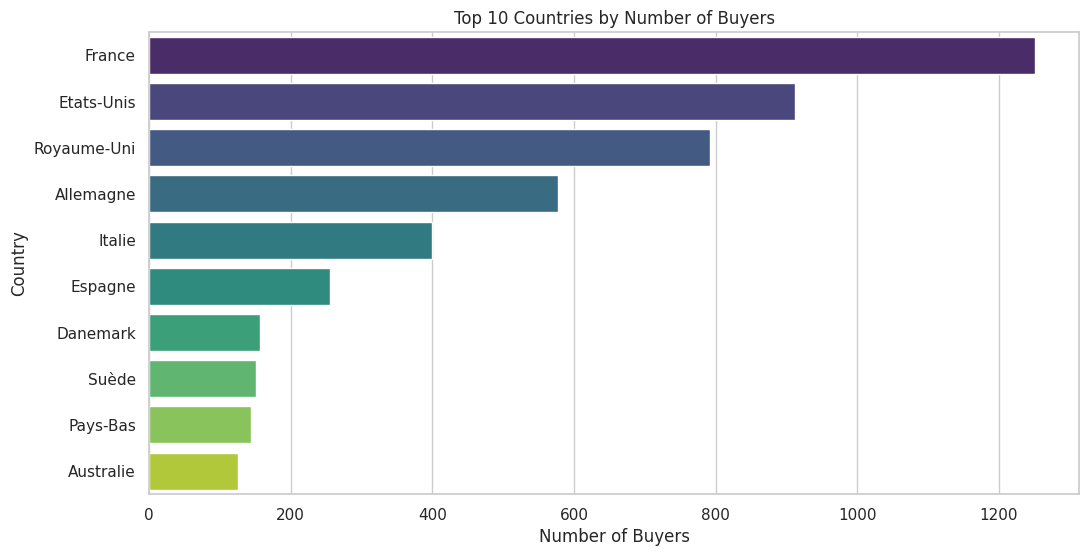

Index(['index', 'country', 'sex', 'nbsellers', 'meanproductssold',
       'meanproductslisted', 'meansellerpassrate', 'totalproductssold',
       'totalproductslisted', 'meanproductsbought', 'meanproductswished',
       'meanproductsliked', 'totalbought', 'totalwished', 'totalproductsliked',
       'meanfollowers', 'meanfollows', 'percentofappusers',
       'percentofiosusers', 'meanseniority'],
      dtype='object')


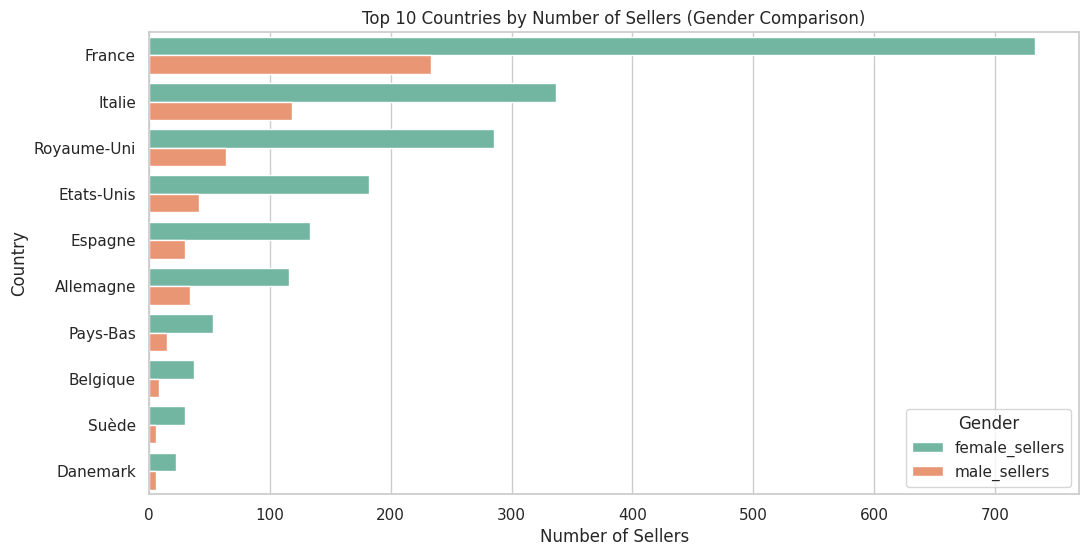

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visual style
sns.set(style="whitegrid")

# Analyze Buyers Distribution
buyers_summary = buyers_data[['country', 'buyers', 'topbuyers']].sort_values(by='buyers', ascending=False).head(10)

# Plot Buyers Distribution by Country
plt.figure(figsize=(12, 6))
sns.barplot(x='buyers', y='country', data=buyers_summary, palette='viridis')
plt.title('Top 10 Countries by Number of Buyers')
plt.xlabel('Number of Buyers')
plt.ylabel('Country')
plt.show()

# Check column names in sellers_comparison
print(sellers_comparison.columns)

# Aggregate sellers data by country and sex
sellers_agg = sellers_comparison.groupby(['country', 'sex'])['nbsellers'].sum().reset_index()

# Pivot the table to get separate columns for male and female sellers
sellers_pivot = sellers_agg.pivot(index='country', columns='sex', values='nbsellers').reset_index()
sellers_pivot.columns = ['country', 'female_sellers', 'male_sellers']

# Sort and get the top 10 countries based on the total number of sellers
sellers_pivot['total_sellers'] = sellers_pivot['female_sellers'].fillna(0) + sellers_pivot['male_sellers'].fillna(0)
sellers_summary = sellers_pivot.sort_values(by='total_sellers', ascending=False).head(10)

# Plot Sellers Comparison by Gender and Country
plt.figure(figsize=(12, 6))
sellers_summary_melted = sellers_summary.melt(id_vars='country', value_vars=['female_sellers', 'male_sellers'],
                                              var_name='Gender', value_name='Number of Sellers')
sns.barplot(x='Number of Sellers', y='country', hue='Gender', data=sellers_summary_melted, palette='Set2')
plt.title('Top 10 Countries by Number of Sellers (Gender Comparison)')
plt.xlabel('Number of Sellers')
plt.ylabel('Country')
plt.legend(title='Gender')
plt.show()


In [ ]:
# Check the column names of the sellers_comparison dataset
sellers_comparison_columns = sellers_comparison.columns.tolist()
sellers_comparison_columns


['index',
 'country',
 'sex',
 'nbsellers',
 'meanproductssold',
 'meanproductslisted',
 'meansellerpassrate',
 'totalproductssold',
 'totalproductslisted',
 'meanproductsbought',
 'meanproductswished',
 'meanproductsliked',
 'totalbought',
 'totalwished',
 'totalproductsliked',
 'meanfollowers',
 'meanfollows',
 'percentofappusers',
 'percentofiosusers',
 'meanseniority']